## Hearing Aid Sales


link to google drive with all the files: https://drive.google.com/drive/folders/1QUu-B8fZAUvu8pj2cyUKfH7MRTwcjqe2?usp=sharing

In [ ]:
#creating a line chart showing percent change in US hearing aid sales vs all retail sales 

#pulling data, hand-compiled from US Census data about sales and data scraped from Hearing Review, which cited the Hearing Industries Association
url = 'https://raw.githubusercontent.com/nicwalter/hearingaids/main/Change%20in%20Hearing%20Aid%20Sales%2C%20Percentage%20Change%20From%20Previous%20Year%20V3.csv'

import pandas as pd
saleschange = pd.read_csv(url)

import altair as alt

saleschange['year'] = saleschange['year'].apply(str)

alt.Chart(saleschange).mark_line().encode(
    x='year', 
    y='percent change',
    color='product'
).properties(
    width = 600, 
    height = 200
).configure_range(
    category={'scheme': 'yellowgreenblue'}
).properties(
    title = "Percentage Change in Sales, Year Over Year")

#noting that the y axis needs to have percentage symbols added (reminder)

alt.Chart(...)

#Cluster Analysis of Hearing Aid Imports by Country 2019-2022 (US Trade Census)

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the file HS code with imports from 2019 to 2022, takes awhile to run
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Computational AP Project/hs_imports_2019_2022.csv",
                 parse_dates=["date"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#showing the head of the data set
df.head()
#GEN_CIF_MO = General Import Value with CIF (Cost, Insurance, Freight) value

,COMM_LVL,CTY_CODE,CTY_NAME,GEN_CIF_MO,GEN_VAL_MO,I_COMMODITY,I_COMMODITY_LDESC,date
0,HS6,0003,EUROPEAN UNION,11326473,10652625,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
1,HS6,0014,PACIFIC RIM COUNTRIES,569212,512625,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
2,HS6,0020,NAFTA,6925,6924,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
3,HS6,0021,TWENTY LATIN AMERICAN REPUBLICS,9734,9154,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
4,HS6,0022,OECD,11334414,10661823,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15


In [ ]:
#filtering hearing aids the ones without accessories
is_hearingaid = (df.I_COMMODITY == 902140)
is_hearingaid.sample(5)

26796129    False
26667034    False
12563368    False
4218212     False
20987777    False
Name: I_COMMODITY, dtype: bool

In [ ]:
#filter out continents/trade regions
df_hearing = df[is_hearingaid]
df_hearing["CTY_NAME"].value_counts()

ASIA                               38
TWENTY LATIN AMERICAN REPUBLICS    38
OECD                               38
ASEAN                              38
NORTH AMERICA                      38
                                   ..
CAMEROON                            7
MACEDONIA                           5
DOMINICAN REPUBLIC                  5
SENEGAL                             5
PORTUGAL                            3
Name: CTY_NAME, Length: 61, dtype: int64

In [ ]:
#when hearing aids are imported or data recorded
df_hearing["date"].value_counts(sort=False)

2021-07-15    46
2019-03-15    39
2019-02-15    35
2021-12-15    51
2021-06-15    45
2021-10-15    51
2021-04-15    43
2019-01-15     6
2021-05-15    44
2021-11-15    51
2021-01-15     6
2019-11-15    49
2019-05-15    42
2019-04-15    41
2019-10-15    49
2021-02-15    36
2019-06-15    44
2019-12-15    49
2019-07-15    45
2021-03-15    41
2020-09-15    45
2020-08-15    44
2020-11-15    46
2020-05-15    41
2022-01-15    30
2020-04-15    41
2020-10-15    46
2020-06-15    43
2020-12-15    48
2022-02-15    35
2020-07-15    43
2020-03-15    39
2020-02-15    38
2020-01-15    34
2019-09-15    48
2019-08-15    48
2021-08-15    48
2021-09-15    50
Name: date, dtype: int64

In [ ]:
#regular expressions to fiter it for countries
starts_0 = df_hearing.CTY_CODE.str.contains("^0")
ends_xxx = df_hearing.CTY_CODE.str.contains("XXX$")
is_dash = df_hearing.CTY_CODE.str.match("-")
not_continent = starts_0 | ends_xxx | is_dash
cond1 = df_hearing.COMM_LVL == "HS6"

cty_df = df_hearing[~not_continent & cond1]

In [ ]:
#all the hearing aids for each country, 15th of each month
cty_df.sample(5)

,COMM_LVL,CTY_CODE,CTY_NAME,GEN_CIF_MO,GEN_VAL_MO,I_COMMODITY,I_COMMODITY_LDESC,date
18904376,HS6,4279,FRANCE,0,0,902140,HEARING AIDS,2020-04-15
12086581,HS6,4870,BULGARIA,0,0,902140,HEARING AIDS,2019-06-15
18275007,HS6,1220,CANADA,21652,20265,902140,HEARING AIDS,2022-01-15
13713328,HS6,4759,ITALY,0,0,902140,HEARING AIDS,2019-07-15
26991804,HS6,4700,SPAIN,0,0,902140,HEARING AIDS,2021-08-15


In [ ]:
#clustering
from sklearn.cluster import KMeans

In [ ]:
#wrangling the data
cty_df2= cty_df.pivot(index='CTY_NAME', columns='date', values='GEN_CIF_MO')
cty_df2.fillna(value = 0, inplace = True)
cty_df2.sample(5)

date,2019-02-15,2019-03-15,2019-04-15,2019-05-15,2019-06-15,2019-07-15,2019-08-15,2019-09-15,2019-10-15,2019-11-15,...,2021-05-15,2021-06-15,2021-07-15,2021-08-15,2021-09-15,2021-10-15,2021-11-15,2021-12-15,2022-01-15,2022-02-15
CTY_NAME,,,,,,,,,,,,,,,,,,,,,
PORTUGAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13044.0,0.0,0.0,0.0,0.0
AUSTRALIA,15123011.0,18037080.0,16768807.0,22250972.0,38318781.0,27168998.0,22235926.0,20134120.0,20723374.0,24118216.0,...,26098160.0,19755003.0,31939192.0,21282723.0,18173537.0,27275760.0,23886007.0,26645646.0,14131847.0,22056123.0
SINGAPORE,2384094.0,3685422.0,3125690.0,2480293.0,1634850.0,1062150.0,3583285.0,1321752.0,1925785.0,1164135.0,...,13988404.0,12535889.0,7134262.0,5215779.0,6009021.0,4207168.0,4812282.0,1446603.0,5637458.0,6766270.0
SWITZERLAND,8424192.0,7698187.0,6918986.0,10165326.0,10551044.0,8579344.0,7971646.0,11766102.0,12156842.0,12325571.0,...,12206358.0,15186481.0,13468751.0,12686037.0,16608511.0,14681562.0,19233355.0,17161117.0,7943594.0,17578911.0
CANADA,6669.0,7245.0,0.0,14423.0,0.0,0.0,35430.0,6050.0,17284.0,5906.0,...,57570.0,16126.0,76593.0,72381.0,60603.0,61910.0,77373.0,85483.0,21652.0,26134.0


In [ ]:
#assigning clusters
num_clust = 4
clust_out = KMeans(n_clusters=num_clust).fit(cty_df2)
labels = clust_out.labels_
centroids = clust_out.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.



In [ ]:
#number of countries in each cluster
centroids.shape

(4, 37)

In [ ]:
#seeing the clusters, labels is cluster number
year_cols = cty_df2.columns
cty_df2['labels'] = labels
cty_df2 = cty_df2.reset_index()

In [ ]:
cty_df2.iloc[:3, :3]

date,CTY_NAME,2019-02-15 00:00:00,2019-03-15 00:00:00
0,ANTIGUA AND BARBUDA,0.0,0.0
1,AUSTRALIA,15123011.0,18037080.0
2,AUSTRIA,0.0,0.0


In [ ]:
#more wrangling and creating a loop to randomize it
cty_df = []
for i in range(num_clust):
  
  cty_df.append(cty_df2[cty_df2.labels == i].sample(2))

merge_df = pd.concat(cty_df)

In [ ]:
#middle of the cluster
import pandas as pd
centroid_df = pd.DataFrame(centroids, columns=year_cols)
centroid_df['labels'] = list(range(num_clust))
centroid_df = centroid_df.reset_index()

In [ ]:
#putting it all together
df1 = pd.melt(merge_df, id_vars=["CTY_NAME", "labels"],
              value_vars=year_cols,
              var_name="date",
              value_name="GEN_CIF_MO")
centroid_df2 = pd.melt(centroid_df, id_vars=["index", "labels"],
              value_vars=year_cols,
              var_name="date",
              value_name="GEN_CIF_MO")

In [ ]:
#cluster and countries 
df1.head()

,CTY_NAME,labels,date,GEN_CIF_MO
0,BULGARIA,0,2019-02-15,14263.0
1,BAHAMAS,0,2019-02-15,0.0
2,VIETNAM,1,2019-02-15,22130364.0
3,POLAND,1,2019-02-15,25285141.0
4,AUSTRALIA,2,2019-02-15,15123011.0


In [ ]:
#countries in each cluster
df1.labels.value_counts()

0    74
1    74
2    74
3    74
Name: labels, dtype: int64

In [ ]:
#visualize the clusters
import altair as alt

line = alt.Chart(df1).mark_line(opacity=0.5).encode(
    x='date',
    y='GEN_CIF_MO',
    color='labels:N',
    
)

In [ ]:
#other visual
line_centroid = alt.Chart(centroid_df2).mark_line().encode(
    x='date',
    y='GEN_CIF_MO',
    color='labels:N',
    
)

In [ ]:
#putting it together 
alt.layer(line, line_centroid)

alt.LayerChart(...)

In [ ]:
#which countries are in cluster named '1'
df1[df1['labels']==1]['CTY_NAME'].value_counts()

VIETNAM    37
POLAND     37
Name: CTY_NAME, dtype: int64

## Poland and Vietnam the largest exporters of hearing aids to the US.

## Cluster Analysis by products imported by the US to find which products are similar in trading patterns with hearing aids.

In [ ]:
#original data
df.head()

,COMM_LVL,CTY_CODE,CTY_NAME,GEN_CIF_MO,GEN_VAL_MO,I_COMMODITY,I_COMMODITY_LDESC,date
0,HS6,0003,EUROPEAN UNION,11326473,10652625,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
1,HS6,0014,PACIFIC RIM COUNTRIES,569212,512625,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
2,HS6,0020,NAFTA,6925,6924,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
3,HS6,0021,TWENTY LATIN AMERICAN REPUBLICS,9734,9154,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15
4,HS6,0022,OECD,11334414,10661823,450410,"BLOCKS, PLATES, SHEETS AND STRIP, TILES OF ANY...",2021-07-15


In [ ]:
#filtering for only countries and only HS6 products as hearing aids are only in HS6
starts_ = df.CTY_CODE.str.contains("^0")
ends_xxxx = df.CTY_CODE.str.contains("XXX$")
is_dash_ = df.CTY_CODE.str.match("-")
not_continent2 = starts_ | ends_xxxx | is_dash_
cond3 = df.COMM_LVL == "HS6"

df2 = df[~not_continent2 & cond3]

In [ ]:
df2.sample(6)

,COMM_LVL,CTY_CODE,CTY_NAME,GEN_CIF_MO,GEN_VAL_MO,I_COMMODITY,I_COMMODITY_LDESC,date
12383695,HS6,4231,BELGIUM,222665,212165,280300,"CARBON, NESOI (INCLUDING CARBON BLACK)",2019-06-15
20694397,HS6,5650,PHILIPPINES,840,840,540753,"WOVEN FABRICS OF SYNTHETIC FILAMENTS NESOI, 85...",2020-06-15
5866036,HS6,5200,UNITED ARAB EMIRATES,109318,99318,721720,"WIRE OF IRON OR NONALLOY STEEL, PLATED OR COAT...",2019-01-15
23684103,HS6,4700,SPAIN,0,0,630293,TOILET AND KITCHEN LINEN OF MANMADE FIBERS,2020-03-15
28124442,HS6,5700,CHINA,1102747,986736,721691,"ANGLES, SHAPES AND SECTIONS, IRON OR NONALLOY ...",2021-09-15
9941764,HS6,4330,AUSTRIA,2460,2149,830160,"PARTS OF LOCKS, OF BASE METAL",2019-04-15


In [ ]:
#putting it in a 3D scatter box to visually see the clusters but had to sample it otherwise the code cell crashes 
from plotly.express import scatter_3d
scatter_3d(df2.sample(100), x='date', y='GEN_CIF_MO', z='I_COMMODITY',hover_name="I_COMMODITY_LDESC",width=1000,height=1000)

### Need to find a way to highlight hearing aids intersecting with other products

## Monthly Imports of Hearing Aids

In [ ]:
#graphic the monthly values of hearing aid imports into the u.s. over the last 10 years

url5 = 'https://raw.githubusercontent.com/nicwalter/hearingaids/main/Imports%20of%20Hearing%20Aids%2C%20Monthly%20Total.csv' 

import pandas as pd
monthlyimports = pd.read_csv(url5,parse_dates=["Time"])

monthlyimports['Customs Value (Gen) ($US)'] = monthlyimports['Customs Value (Gen) ($US)'].str.replace(',','')
monthlyimports['Customs Value (Gen) ($US)'] = monthlyimports['Customs Value (Gen) ($US)'].astype('float')

import altair as alt

alt.Chart(monthlyimports).mark_area().encode(
    alt.X('Time:T'),
    alt.Y('Customs Value (Gen) ($US):Q')
).properties(
    title = "Monthly Imports of Hearing Aids Into the U.S."
)

alt.Chart(...)

# Comparing market price of hearing aids over 5 years- Mexico vs BC EU 
### The data obtained from Bloomberg terminal- Consumer Price Index of hearing aids in Mexico and GP prices of company BC EU- how well it did in the market. A lot of European countries have outsourced production to Mexico, Poland and Vietnam.

In [ ]:
#uploading the file for the CPI of hearing aids in Mexico, all prices in USD
import pandas as pd
mexico = pd.read_csv("/content/drive/MyDrive/Computational AP Project/Mexico CPI by product.csv",parse_dates=["Date"])

In [ ]:
mexico.head()

,Date,MXIDLENS
0,NaT,<NSA>
1,NaT,Mexico CPI by Products Medical Devices Lenses ...
2,2022-03-31,117.2
3,2022-02-28,116.5
4,2022-01-31,115.8


In [ ]:
#renaming column names 
mexico = mexico.iloc[2:61]
cs=list(mexico.columns)
cs[1]="Price"
mexico.columns=cs
mexico.head()

,Date,Price
2,2022-03-31,117.2
3,2022-02-28,116.5
4,2022-01-31,115.8
5,2021-12-31,114.2
6,2021-11-30,113.4


In [ ]:
#uploading EU 
EU = pd.read_csv("/content/drive/MyDrive/Computational AP Project/BC EU Hearing aid Index 2017-22 GP Price chart.csv",parse_dates=["Date"])
EU.head()

,Date,Open,High,Low,Close,Volume,SMAVG (15)
0,2022-05-04,105.93177,106.45197,97.60234,103.84371,5380000.0,NaN
1,2022-04-29,105.55367,108.37410,105.38441,107.39937,4090000.0,NaN
2,2022-03-31,126.02631,126.02631,126.02631,126.02631,NaN,NaN
3,2022-02-28,124.58045,124.58045,124.58045,124.58045,NaN,NaN
4,2022-01-31,129.30292,129.30292,129.30292,129.30292,NaN,NaN


In [ ]:
#only look at closing prices
#renaming EU's close column to price so that it works in altair with mexico
cs2=list(EU.columns)
cs2[4]="Price"
EU.columns=cs2
EU.head()

,Date,Open,High,Low,Price,Volume,SMAVG (15)
0,2022-05-04,105.93177,106.45197,97.60234,103.84371,5380000.0,NaN
1,2022-04-29,105.55367,108.37410,105.38441,107.39937,4090000.0,NaN
2,2022-03-31,126.02631,126.02631,126.02631,126.02631,NaN,NaN
3,2022-02-28,124.58045,124.58045,124.58045,124.58045,NaN,NaN
4,2022-01-31,129.30292,129.30292,129.30292,129.30292,NaN,NaN


In [ ]:
#merging the datasets
from pandas import merge
Prices= merge(mexico,EU,on="Date",how="inner")
Prices.head()

,Date,Price_x,Open,High,Low,Price_y,Volume,SMAVG (15)
0,2022-03-31,117.2,126.02631,126.02631,126.02631,126.02631,NaN,NaN
1,2022-02-28,116.5,124.58045,124.58045,124.58045,124.58045,NaN,NaN
2,2022-01-31,115.8,129.30292,129.30292,129.30292,129.30292,NaN,NaN
3,2021-12-31,114.2,143.31032,143.31032,143.31032,143.31032,NaN,NaN
4,2021-11-30,113.4,132.42935,132.42935,132.42935,132.42935,NaN,NaN


In [ ]:
#groupby for the columns
Prices2 = Prices.groupby(["Date","Price_x","Price_y"],as_index=False)["Price_x", "Price_y"].sum()

Prices2.rename(columns={"Price_x":"Mexico"},inplace=True)
Prices2.rename(columns={"Price_y":"EU"},inplace=True)


Prices2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Mexico,EU
0,2017-05-31,96.1,55.50142
1,2017-06-30,97,53.94830
2,2017-07-31,96.4,55.40648
3,2017-08-31,96.4,57.34234
4,2017-10-31,97.3,59.01092


In [ ]:
#mexico was a string- changed that 
Prices2['Mexico'] = Prices2['Mexico'].astype('float')

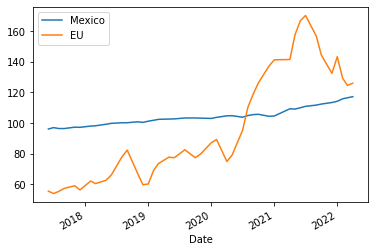

In [ ]:
#visualize it 
Prices2.plot(x='Date',y=['Mexico','EU'])

## Average prices for major hearing aid companies








In [ ]:
#Found on this website- https://www.hearingtracker.com/how-much-do-hearing-aids-cost
#for each product of each company from 2008 to 2021
#downloaded tables and created own dataset with dates in Excel exported as csv

In [ ]:
#file
url7 = 'https://raw.githubusercontent.com/tanyakaushaljournalist/Hearing-Aid-Supply-Chain/main/hearing.aid.prices.companies.-.Sheet1.csv'
import pandas as pd
company_prices = pd.read_csv(url7,parse_dates=["Year"])
company_prices.head()

,Model,Date,Average Price,Average Year Prices,Company,Average Yearly Prices of New Models,Year
0,ReSound Key 4,2021.0,"$2,015","$1,714",ReSound,"1,714",2021-01-01
1,ReSound Key 3,2021.0,"$1,614",NaN,ReSound,3210,2020-01-01
2,ReSound Key 2,2021.0,"$1,514",NaN,ReSound,3257,2019-01-01
3,ReSound One 9,2020.0,"$3,575","$3,210",ReSound,3158,2018-01-01
4,ReSound One 7,2020.0,"$3,542",NaN,Widex,2697,2020-01-01


In [ ]:
import plotly.express as px
import pandas as pd
fig = px.funnel(company_prices, x='Year', y='Average Yearly Prices of New Models', color='Model')
fig.show()

#Global Trade Concerns from WTO 

In [ ]:
#json file
from urllib.request import urlopen
  
import json

url = "https://tradeconcerns.wto.org/api/specificTradeConcerns/v1/stcs/getByMeetingChartItem?language=English&page=1&pageSize=20&&SearchParameterYear=&SearchParameterIsNew=&SearchParameterMeeting="
  
response = urlopen(url)

data_json = json.loads(response.read())
  
print(data_json)

[{'name': 'Previously raised trade concerns', 'data': [{'dataId': None, 'name': '1995', 'y': 1, 'isNew': False}, {'dataId': None, 'name': '1996', 'y': 7, 'isNew': False}, {'dataId': None, 'name': '1997', 'y': 18, 'isNew': False}, {'dataId': None, 'name': '1998', 'y': 31, 'isNew': False}, {'dataId': None, 'name': '1999', 'y': 21, 'isNew': False}, {'dataId': None, 'name': '2000', 'y': 27, 'isNew': False}, {'dataId': None, 'name': '2001', 'y': 59, 'isNew': False}, {'dataId': None, 'name': '2002', 'y': 63, 'isNew': False}, {'dataId': None, 'name': '2003', 'y': 52, 'isNew': False}, {'dataId': None, 'name': '2004', 'y': 61, 'isNew': False}, {'dataId': None, 'name': '2005', 'y': 40, 'isNew': False}, {'dataId': None, 'name': '2006', 'y': 45, 'isNew': False}, {'dataId': None, 'name': '2007', 'y': 53, 'isNew': False}, {'dataId': None, 'name': '2008', 'y': 54, 'isNew': False}, {'dataId': None, 'name': '2009', 'y': 70, 'isNew': False}, {'dataId': None, 'name': '2010', 'y': 73, 'isNew': False}, {'d

In [ ]:
print(type(data_json))

<class 'list'>


In [ ]:
len(data_json)

2

In [ ]:
import pandas as pd
prev_concerns = pd.DataFrame(data_json[0].get('data'))
new_concerns = pd.DataFrame(data_json[1].get('data'))
prev_concerns['time'] = "previous concerns"
new_concerns['time'] = 'new concerns'
trade_concerns = pd.concat([new_concerns, prev_concerns])

In [ ]:
#previous concerns
trade_concerns.tail()

,dataId,name,y,isNew,time
23,None,2018,108,False,previous concerns
24,None,2019,109,False,previous concerns
25,None,2020,195,False,previous concerns
26,None,2021,150,False,previous concerns
27,None,2022,98,False,previous concerns


In [ ]:
#new concerns raised each year
trade_concerns.head()

,dataId,name,y,isNew,time
0,None,1995,6,True,new concerns
1,None,1996,17,True,new concerns
2,None,1997,35,True,new concerns
3,None,1998,36,True,new concerns
4,None,1999,18,True,new concerns


In [ ]:
#rename y
trade_concerns= trade_concerns.rename(columns={'y': 'number of concerns raised', 'name': 'year'})
trade_concerns.head()

,dataId,year,number of concerns raised,isNew,time
0,None,1995,6,True,new concerns
1,None,1996,17,True,new concerns
2,None,1997,35,True,new concerns
3,None,1998,36,True,new concerns
4,None,1999,18,True,new concerns


In [ ]:
#line graph
alt.Chart(trade_concerns).mark_bar().encode(
    x="year",
    y="number of concerns raised",
    color="time"
)

alt.Chart(...)

## Demographics of Hearing Aid Users 

## Data available on Hearing Tracker : https://www.hearingtracker.com/how-much-do-hearing-aids-cost#a-hearing-aid-purchase-trends

## Severity of Hearing Loss Among the Survey Respondents

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the file, it was not reading csv before, it was reading it as string
import pandas as pd
import csv
f = open('/content/drive/MyDrive/Computational AP Project/severity of hearing aids.csv') # use binary mode if on windows
severity = [i for i in csv.reader(f) ] #list comprehension to read from file
f.close() 
print (severity)

[['Hearing loss group', 'Percent'], ['Profound', '18.2'], ['Severe to profound', '6.2'], ['Moderate to profound', '1.7'], ['Mild to profound', '0.3'], ['Severe', '31.4'], ['Moderate to severe', '7.7'], ['Mild to severe', '0.5'], ['Moderate', '28.9'], ['Mild to moderate', '2.2'], ['Mild', '2.9']]


In [ ]:
type(severity)

list

In [ ]:
#converting list to dataframe
severe_hearing = pd.DataFrame(severity, columns =['Hearing loss group', 'Percent']) 
severe_hearing.head()

,Hearing loss group,Percent
0,Hearing loss group,Percent
1,Profound,18.2
2,Severe to profound,6.2
3,Moderate to profound,1.7
4,Mild to profound,0.3


In [ ]:
#delete first row
severe_hearing_loss = severe_hearing.iloc[1: , :]
severe_hearing_loss.head()

,Hearing loss group,Percent
1,Profound,18.2
2,Severe to profound,6.2
3,Moderate to profound,1.7
4,Mild to profound,0.3
5,Severe,31.4


In [ ]:
severe_hearing_loss.sort_values(by='Percent', ascending=False, na_position='first')

,Hearing loss group,Percent
6,Moderate to severe,7.7
2,Severe to profound,6.2
5,Severe,31.4
8,Moderate,28.9
10,Mild,2.9
9,Mild to moderate,2.2
1,Profound,18.2
3,Moderate to profound,1.7
7,Mild to severe,0.5
4,Mild to profound,0.3


In [ ]:
import plotly.express as px
fig = px.funnel(severe_hearing_loss, x='Percent', y='Hearing loss group')
fig.show()

## Pre-tax income of survey respondents

In [ ]:
#importing the file
income = pd.read_csv('/content/drive/MyDrive/Computational AP Project/income of hearing users.csv')
income.head()

,Pre-tax household income,Percent
0,$150k+,10.6
1,$100 - $149k,13.4
2,$50 - $99k,26.0
3,$25k - $49k,15.5
4,Under $25k,6.2


## how long until they decided to get a hearing aid

In [ ]:
#file
until_hearingaid = pd.read_csv('/content/drive/MyDrive/Computational AP Project/how long did it take to get your first hearing aid.csv')
until_hearingaid.head()

,From the time you first learned you had a hearing problem,how long did you wait before purchasing your first hearing aids?\t% of Responses
0,1 year or less,42.0
1,1 year+,10.5
2,2+ years,8.7
3,3+ years,7.0
4,4+ years,3.7


## Tech Level of Hearing Aid Purchased

In [ ]:
tech_level = pd.read_csv('/content/drive/MyDrive/Computational AP Project/level of tech of hearing aids purchased.csv')
tech_level.head()

,What level of technology did you purchase?,% of Responses
0,Top-end,54.1
1,Mid-range,34.3
2,Low-end,3.7
3,Not sure,7.9


In [ ]:
import plotly.express as px
fig = px.funnel(tech_level, x='% of Responses', y='What level of technology did you purchase?')
fig.show()